## **Ridge Regularization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
df = load_diabetes()

In [3]:
X = df.data
y = df.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred = lr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
print("R squared error is:", r2_score(y_test, y_pred))
print("RMSE is:", np.sqrt(mean_squared_error(y_test, y_pred)))

R squared error is: 0.5188113124539249
RMSE is: 48.72713760953253


In [12]:
from sklearn.linear_model import Ridge

In [13]:
Rdg = Ridge(alpha=0.001)

In [14]:
Rdg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [15]:
print(Rdg.coef_)
print(Rdg.intercept_)

[  24.01614407 -246.40604384  493.5928598   329.08832995 -852.76773624
  479.42466903  131.86682689  243.03291973  748.96464364   90.15508276]
152.12463296924477


In [16]:
y_pred2 = Rdg.predict(X_test)

In [17]:
print("R squared error is:", r2_score(y_test, y_pred2))
print("RMSE is:", np.sqrt(mean_squared_error(y_test, y_pred2)))

R squared error is: 0.5201448351821765
RMSE is: 48.65957177859253


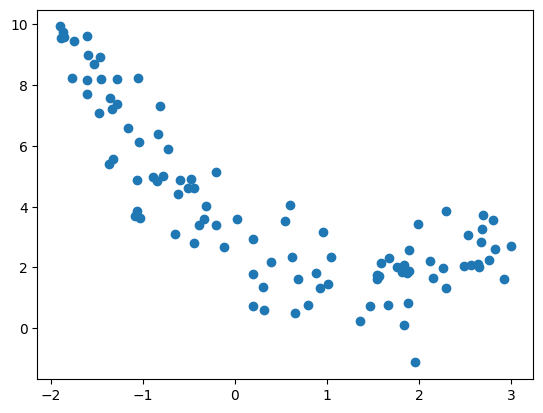

In [18]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

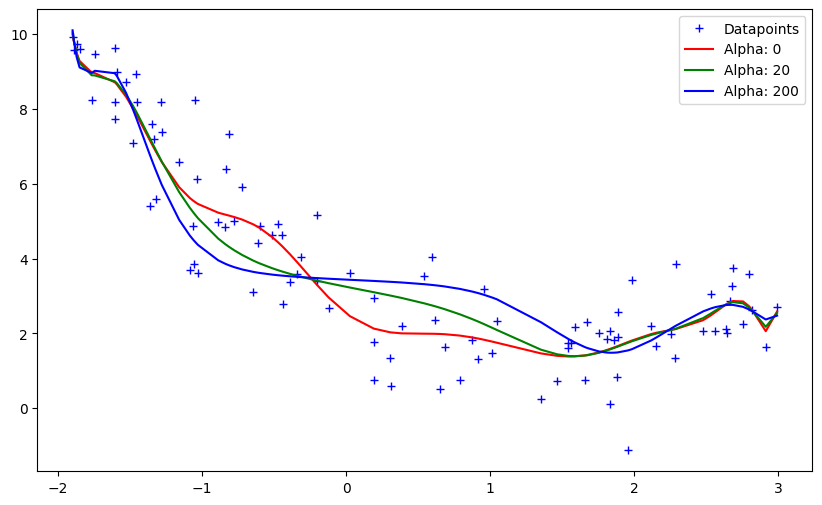

In [20]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()